In [504]:
from analysis_utils import *
%load_ext autoreload
%autoreload
def transportRxnCalc(gr):
    colors = ['darkblue','#D43F3A']
    gr_i_list = ['gr_1']
    phi_list = [0.13,0.22,0.30,0.36,0.39,0.42]
    markers = ['*','^']
    transport_phi = list()
    reaction_phi = list()
    search_phi = list()
    transport_std_phi =list()
    rxn_std_phi =list()
    search_std_phi =list()
    search_list = list()
    for j,gr_i in enumerate(gr_i_list):
        transport_vals_list = list()
        reaction_vals_list = list()
        search_vals_list = list()
        transport_std_list = list()
        rxn_std_list = list()
        search_std_list = list()
        
        for i in range(list(gr_dict['gr_1'].keys())[0],list(gr_dict['gr_1'].keys())[-1]+1):
            transport_vals = gr[gr_i][i].bootavg_transportT*1000/1608733*p_codon_count_hist_weighted_avg[i]/(1-p_codon_count_hist_weighted_avg[0])
            rxn_vals = gr[gr_i][i].bootavg_rxnT*1000/1608733*p_codon_count_hist_weighted_avg[i]/(1-p_codon_count_hist_weighted_avg[0])
            search_vals = gr[gr_i][i].bootavg_searchT*1000/1608733*p_codon_count_hist_weighted_avg[i]/(1-p_codon_count_hist_weighted_avg[0])
            
            transport_std = gr[gr_i][i].bootstd_transportT*1000/1608733*p_codon_count_hist_weighted_avg[i]/(1-p_codon_count_hist_weighted_avg[0])
            rxn_std = gr[gr_i][i].bootstd_rxnT*1000/1608733*p_codon_count_hist_weighted_avg[i]/(1-p_codon_count_hist_weighted_avg[0])
            search_std = gr[gr_i][i].bootstd_searchT*1000/1608733*p_codon_count_hist_weighted_avg[i]/(1-p_codon_count_hist_weighted_avg[0])

            transport_vals_list.append(np.array(transport_vals))
            reaction_vals_list.append(np.array(rxn_vals))
            search_vals_list.append(np.array(search_vals))
            
            transport_std_list.append(np.array(transport_std))
            rxn_std_list.append(np.array(rxn_std))
            search_std_list.append(np.array(search_std))
            
            search_list.append(np.array(gr[gr_i][i].searchT)*1000/1608733)
            print('Unweighted search time (', str(i), ' cognate)', np.array(search_vals/p_codon_count_hist_weighted_avg[i]))
        transport_phi.append(np.sum(transport_vals_list))
        reaction_phi.append(np.sum(reaction_vals_list))
        search_phi.append(np.sum(search_vals_list))
        
        transport_std_phi.append(np.sum(transport_std_list))
        rxn_std_phi.append(np.sum(rxn_std_list))
        search_std_phi.append(np.sum(search_std_list))

    print("Transport time: ", transport_phi, " +/- ", transport_std_phi)
    print("Reaction time: ", reaction_phi, " +/- ", rxn_std_phi)
    print("Search time: ", search_phi, " +/- ", search_std_phi)
    
    return search_list,transport_phi, reaction_phi, search_phi, transport_std_phi,rxn_std_phi,search_std_phi
rxndiff=dict()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [505]:
import numpy as np

ptRNA = [0.0521, 0.0099, 0.0762, 0.0102, 0.0139, 0.0067, 0.0191, 0.0384, 0.0255, 0.0123, 0.0141,\
 0.0757, 0.0343, 0.0699, 0.0102, 0.0557, 0.0717, 0.0151, 0.0107, 0.0307, \
 0.0165, 0.0309, 0.0113, 0.0166, 0.0144, 0.0115, 0.0093, 0.0035, 0.0208, 0.0055, 0.0226, \
 0.0123, 0.0017, 0.0087, 0.0176, 0.0147, 0.0151, 0.0326, 0.0616,0.0203]
ptRNA = np.divide(ptRNA,sum(ptRNA))

tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met_m", "Phe", "Pro1", "Pro2", "Pro3", "Sel_Cys", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1pTyr2", "Val1", "Val2ApB"]

ptRNA_dict = dict(zip(tRNA_tags, ptRNA))

codons_Ec = ["GGG", "GGA", "GGU", "GGC", "GAG", "GAA", "GAU", "GAC", "GUG", "GUA", "GUU", \
"GUC", "GCG", "GCA", "GCU", "GCC", "AGG", "AGA", "AGU", "AGC", "AAG", "AAA", \
"AAU", "AAC", "AUG", "AUA", "AUU", "AUC", "ACG", "ACA", "ACU", "ACC", "UGG", \
"UGA", "UGU", "UGC", "UAU", "UAC", "UUG", "UUA", "UUU", "UUC", "UCG", "UCA", \
"UCU", "UCC", "CGG", "CGA", "CGU", "CGC", "CAG", "CAA", "CAU", "CAC", "CUG", \
"CUA", "CUU", "CUC", "CCG", "CCA", "CCU", "CCC"]

pcodons_Ec =[0.00483, 0.00272, 0.03847, 0.03579, 0.01665, 0.05335, 0.02436, \
0.02885, 0.02150, 0.01594, 0.03146, 0.01130, 0.03047, 0.02223, \
0.02898, 0.01989, 0.00009, 0.00113, 0.00401, 0.01203, 0.01214, \
0.04464, 0.00984, 0.02808, 0.02247, 0.00093, 0.02148, 0.03685, \
0.00757, 0.00350, 0.01394, 0.02663, 0.00981, 0.00031, 0.00425, \
0.00531, 0.01073, 0.01628, 0.00666, 0.00616, 0.01261, 0.02279, \
0.00608, 0.00391, 0.01318, 0.01120, 0.00176, 0.00133, 0.03126, \
0.02235, 0.02938, 0.01024, 0.00927, 0.01396, 0.06041, 0.00216, \
0.00573, 0.00622, 0.02965, 0.00655, 0.00501, 0.00332]
pcodons_Ec = np.divide(pcodons_Ec,sum(pcodons_Ec))

pcodon_dict = dict(zip(codons_Ec, pcodons_Ec))

#Note AUA does not have an assigned tRNA
codon_dict={'GGG': ['Gly2'], 'GGA': ['Gly2'], 'GGU': ['Gly3'], 'GGC': ['Gly3'], \
'GAG': ['Glu2'], 'GAA': ['Glu2'], 'GAU': ['Asp1'], 'GAC': ['Asp1'], \
'GUG': ['Val1'], 'GUA': ['Val1'], 'GUU': ['Val1','Val2ApB'], \
'GUC': ['Val2ApB'], 'GCG': ['Ala1B'], 'GCA': ['Ala1B'], 'GCU': ['Ala1B'], \
'GCC': ['Ala2'], 'AGG': ['Arg5'], 'AGA': ['Arg4'], 'AGU': ['Ser3'], \
'AGC': ['Ser3'], 'AAG': ['Lys'], 'AAA': ['Lys'], 'AAU': ['Asn'], \
'AAC': ['Asn'], 'AUG': ['Met_m'], 'AUA': [], 'AUU': ['Ile1'], \
'AUC': ['Ile1'], 'ACG': ['Thr2','Thr4'], 'ACA': ['Thr4'], \
'ACU': ['Thr1','Thr4','Thr3'], 'ACC': ['Thr3','Thr1'], \
'UGG': ['Trp'], 'UGA': ['Sel_Cys'], 'UGU': ['Cys'], 'UGC': ['Cys'], \
'UAU': ['Tyr1pTyr2'], 'UAC': ['Tyr1pTyr2'], 'UUG': ['Leu5','Leu4'], \
'UUA': ['Leu5'], 'UUU': ['Phe'], 'UUC': ['Phe'], 'UCG': ['Ser1','Ser2'], \
'UCA': ['Ser1'], 'UCU': ['Ser5','Ser1'], 'UCC': ['Ser5'], 'CGG': ['Arg3'], \
'CGA': ['Arg2'], 'CGU': ['Arg2'], 'CGC': ['Arg2'], 'CAG': ['Gln2'], \
'CAA': ['Gln1'], 'CAU': ['His'], 'CAC': ['His'], 'CUG': ['Leu1','Leu3'], \
'CUA': ['Leu3'], 'CUU': ['Leu2'], 'CUC': ['Leu2'], 'CCG': ['Pro1','Pro3'], \
'CCA': ['Pro3'], 'CCU': ['Pro2','Pro3'], 'CCC': ['Pro2']}

cells = 1
TU = 9500*20
time = 180
tRNA_distrib_arr = list()
codon_count = {}
codon_time = {}
codon_time_avg = {}
codon_time_weighted_avg={}
codon_count_hist = {}
codon_count_hist_weighted_avg = np.zeros(42)
p_codon_tRNA = {}

for key in codon_dict:
    codon_count[key] = []
    codon_time[key] = []
    codon_time_avg[key] = []
    codon_time_weighted_avg[key]=[]
    codon_count_hist[key]=[]
    p_codon_tRNA[key] = []

# Construct dictionary that assigns probability of all tRNA specific to a certain codon
# to that codon (p_codon_tRNA)
for codon in codon_dict:
    p_codon_tRNA_i = 0
    for tRNA in codon_dict[codon]:
        p_codon_tRNA_i += ptRNA_dict[tRNA]
    p_codon_tRNA[codon].append(p_codon_tRNA_i)

for cell in range(cells):
    # Generate distribution for cognate tRNA count for each codon
    for i in range(TU):
            
        #Construct translation unit with random tRNA (weighted by specific tRNA abundances)
        #and 1 random codon (weighted by codon probabilities).
        tRNA_vox = list(np.random.choice(tRNA_tags,42,p=ptRNA))
        codon_vox = np.random.choice(codons_Ec, 1)

        #Count how many cognate tRNA appeared in the translation unit (for given codon) and record in codon_count
        codon_count_i = 0
        for tRNA in codon_dict[codon_vox[0]]:
            codon_count_i += tRNA_vox.count(tRNA)
        codon_count[codon_vox[0]].append(codon_count_i)
    
    for codon in codon_count:
        #Generate histogram of cognate tRNA counts for each codon
        codon_count_hist[codon] = np.histogram(codon_count[codon], bins=np.arange(0,43))[0]/sum(np.histogram(codon_count[codon], bins=np.arange(0,43))[0])
        
        #Weight histogram by codon probabilities to generate weighted average histogram for all codon
        codon_count_hist_weighted_avg += codon_count_hist[codon]*pcodon_dict[codon]
    p_codon_count_hist_weighted_avg = codon_count_hist_weighted_avg
    print(p_codon_count_hist_weighted_avg)

[2.44151914e-01 2.58307718e-01 1.94546408e-01 1.37163404e-01
 8.60658345e-02 4.55691871e-02 2.08109724e-02 9.07913139e-03
 2.92496850e-03 1.00037570e-03 2.95754924e-04 6.66014010e-05
 1.77301429e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


0.9866154379505945
[2.44151914e-01 2.58307718e-01 1.94546408e-01 1.37163404e-01
 8.60658345e-02 4.55691871e-02 2.08109724e-02 9.07913139e-03
 2.92496850e-03 1.00037570e-03 2.95754924e-04 6.66014010e-05
 1.77301429e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
1.85572582855984


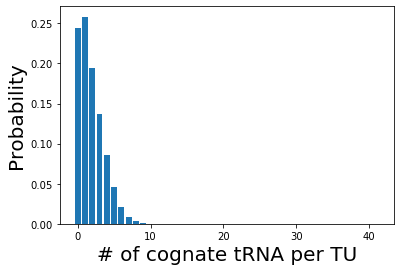

In [506]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline

plt.bar(np.arange(0,42),p_codon_count_hist_weighted_avg)
plt.xlabel('# of cognate tRNA per TU',fontsize=20)
plt.ylabel('Probability',fontsize=20)
print(sum(p_codon_count_hist_weighted_avg[0:7]))
print(p_codon_count_hist_weighted_avg)
print(sum(np.multiply(p_codon_count_hist_weighted_avg,np.arange(0,42))))

In [387]:
from analysis_utils import *
%load_ext autoreload
%autoreload
path = "/Users/Akshay/Documents/TranslationDynamics/data/"

data = "191204_2146/"
gr_sim = dict()

for i in range(1,2):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+900,scaling=1)
    gr_sim[i] = (CellLatencies(sim_i))
    transport_times = np.array(sim_i[0])*1000/1608733
    reaction_times = (np.array(sim_i[1])*1000/1608733)
    search_times = (np.array(sim_i[5])*1000/1608733)

reaction_times_exp = list()
elongation_times_exp = list()
for i in range(10000):
    reaction_times_exp.append(np.random.choice([times[0] for times in reaction_times])+np.random.exponential((1000/1529+1000/209+1000/200+1000/32)))
    elongation_times_exp.append(np.random.choice([times[0] for times in search_times])+np.random.exponential((1000/1529+1000/209+1000/200+1000/32)))
#gr_dict = {'gr_1':gr_sim}
#search_list = transportRxnCalc(gr_dict)[0]
#rxndiff['06'] = transportRxnCalc(gr_dict)[1:]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test
missing expt
413
missing expt
503


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.08006052382807259
41.98043989645079


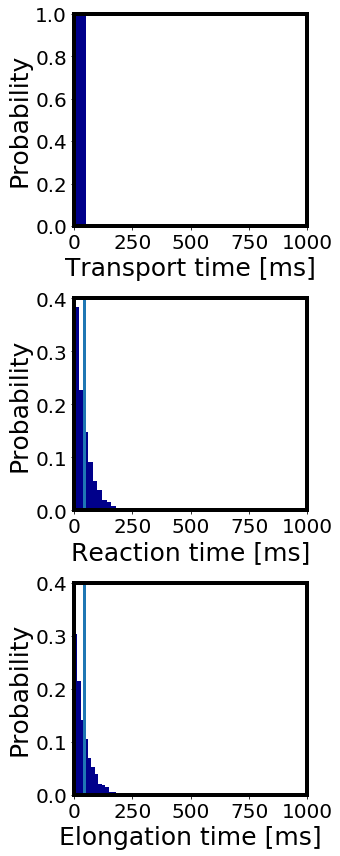

In [391]:
from IPython.core.display import display, HTML
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

%matplotlib inline
%load_ext autoreload
%autoreload

fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize=(5,12))
transport_hist = np.histogram([times[0] for times in transport_times],bins=20,range=(0,1000))
ax1.bar(transport_hist[1][0:-1],transport_hist[0]/sum(transport_hist[0]),align='edge',width=1000/20,color='darkblue')

ax1.set_xlim(0,1000)
ax1.set_ylim(0,1)
ax1.set_ylabel('Probability',size=25)
ax1.set_xlabel('Transport time [ms]',size=25)
ax1.plot([np.average([times[0] for times in transport_times])]*2,[0,0.4],linewidth=3)
print(np.average([times[0] for times in transport_times]))


reaction_hist = np.histogram(reaction_times_exp,bins=20,range=(0,400))

ax2.bar(reaction_hist[1][0:-1],reaction_hist[0]/sum(reaction_hist[0]),align='edge',width=400/20,color='darkblue')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,0.4)
ax2.set_ylabel('Probability',size=25)
ax2.set_xlabel('Reaction time [ms]',size=25)
ax2.plot([np.average(reaction_times_exp)]*2,[0,0.4],linewidth=3)
print(np.average(reaction_times_exp))

elongation_hist = np.histogram(elongation_times_exp,bins=20,range=(0,300))

ax3.bar(elongation_hist[1][0:-1],elongation_hist[0]/sum(elongation_hist[0]),align='edge',width=300/20,color='darkblue')
ax3.set_xlim(0,300)
ax3.set_ylim(0,0.4)
ax3.set_ylabel('Probability',size=25)
ax3.set_xlabel('Elongation time [ms]',size=25)
ax3.plot([np.average(elongation_times_exp)]*2,[0,0.4],linewidth=3)



for _,axes in enumerate([ax1,ax2,ax3]):
    axes.spines['left'].set_linewidth(4)
    axes.spines['bottom'].set_linewidth(4)
    axes.spines['top'].set_linewidth(4)
    axes.spines['right'].set_linewidth(4)
    axes.tick_params(axis='both', which='major', labelsize=20)
    axes.set_xticks(np.arange(0, 1001, 250))


plt.tight_layout()

In [359]:
from analysis_utils import *
%load_ext autoreload
%autoreload
path = "/Users/Akshay/Documents/TranslationDynamics/data/"

data = "191204_2044/"
gr_sim = dict()

for i in range(1,2):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+900,scaling=200)
    gr_sim[i] = (CellLatencies(sim_i))
    transport_times = np.array(sim_i[0])*1000/1608733
    reaction_times = (np.array(sim_i[1])*1000/1608733)
    search_times = (np.array(sim_i[5])*1000/1608733)
reaction_times_exp = list()
elongation_times_exp = list()
for i in range(10000):
    reaction_times_exp.append(np.random.choice([times[0] for times in reaction_times])+np.random.exponential((1000/1529+1000/209+1000/200+1000/32)))
    elongation_times_exp.append(np.random.choice([times[0] for times in search_times])+np.random.exponential((1000/1529+1000/209+1000/200+1000/32)))
#gr_dict = {'gr_1':gr_sim}
#search_list = transportRxnCalc(gr_dict)[0]
#rxndiff['06'] = transportRxnCalc(gr_dict)[1:]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test
missing expt
434
missing expt
853


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
251.03822502473804
42.304669841209154


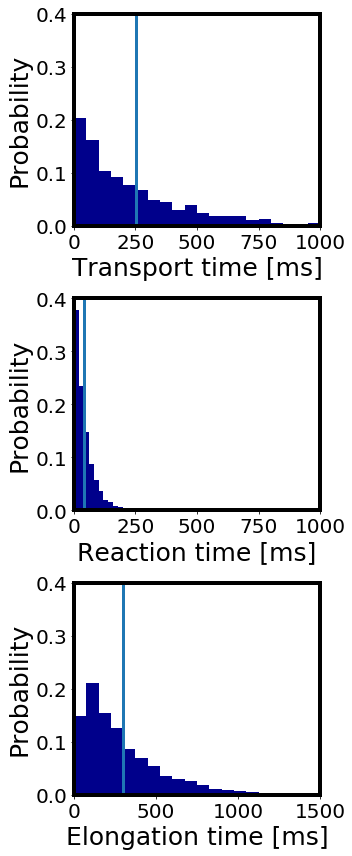

In [363]:
from IPython.core.display import display, HTML
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

%matplotlib inline
%load_ext autoreload
%autoreload

fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize=(5,12))
transport_hist = np.histogram([times[0] for times in transport_times],bins=20,range=(0,1000))

ax1.bar(transport_hist[1][0:-1],transport_hist[0]/sum(transport_hist[0]),align='edge',width=50,color='darkblue')
ax1.set_xlim(0,1000)
ax1.set_ylim(0,0.4)
ax1.set_ylabel('Probability',size=25)
ax1.set_xlabel('Transport time [ms]',size=25)
ax1.plot([np.average([times[0] for times in transport_times])]*2,[0,0.4],linewidth=3)
print(np.average([times[0] for times in transport_times]))


reaction_hist = np.histogram(reaction_times_exp,bins=20,range=(0,400))

ax2.bar(reaction_hist[1][0:-1],reaction_hist[0]/sum(reaction_hist[0]),align='edge',width=400/20,color='darkblue')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,0.4)
ax2.set_ylabel('Probability',size=25)
ax2.set_xlabel('Reaction time [ms]',size=25)
ax2.plot([np.average(reaction_times_exp)]*2,[0,0.4],linewidth=3)
print(np.average(reaction_times_exp))

elongation_hist = np.histogram(elongation_times_exp,bins=20,range=(0,1500))

ax3.bar(elongation_hist[1][0:-1],elongation_hist[0]/sum(elongation_hist[0]),align='edge',width=1500/20,color='darkblue')
ax3.set_xlim(0,1500)
ax3.set_ylim(0,0.4)
ax3.set_ylabel('Probability',size=25)
ax3.set_xlabel('Elongation time [ms]',size=25)
ax3.plot([np.average(elongation_times_exp)]*2,[0,0.4],linewidth=3)


for _,axes in enumerate([ax1,ax2,ax3]):
    axes.spines['left'].set_linewidth(4)
    axes.spines['bottom'].set_linewidth(4)
    axes.spines['top'].set_linewidth(4)
    axes.spines['right'].set_linewidth(4)
    axes.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()

In [371]:
from analysis_utils import *
%load_ext autoreload
%autoreload
path = "/Users/Akshay/Documents/TranslationDynamics/data/"

data = "191204_1953/"
gr_sim = dict()

for i in range(1,2):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+900,scaling=200)
    gr_sim[i] = (CellLatencies(sim_i))
    transport_times = np.array(sim_i[0])*1000/1608733
    reaction_times = (np.array(sim_i[1])*1000/1608733)
    search_times = (np.array(sim_i[5])*1000/1608733)
reaction_times_exp = list()
elongation_times_exp = list()
for i in range(10000):
    reaction_times_exp.append(np.random.choice([times[0] for times in reaction_times])+np.random.exponential((1000/1529+1000/209+1000/200+1000/32)))
    elongation_times_exp.append(np.random.choice([times[0] for times in search_times])+np.random.exponential((1000/1529+1000/209+1000/200+1000/32)))
#gr_dict = {'gr_1':gr_sim}
#search_list = transportRxnCalc(gr_dict)[0]
#rxndiff['06'] = transportRxnCalc(gr_dict)[1:]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
248.1580194985494
62.699179502813706


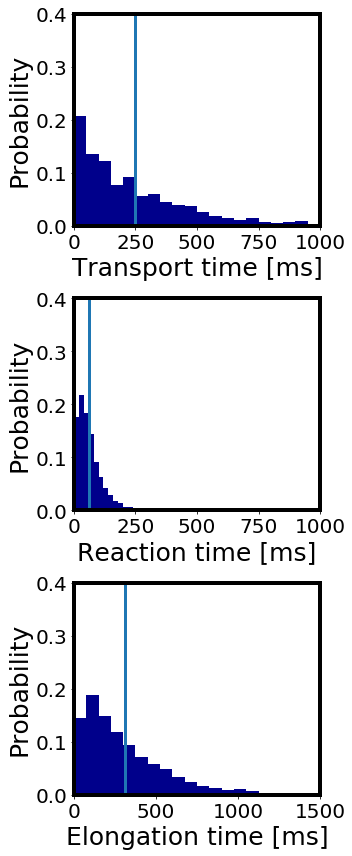

In [372]:
from IPython.core.display import display, HTML
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

%matplotlib inline
%load_ext autoreload
%autoreload

fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize=(5,12))
transport_hist = np.histogram([times[0] for times in transport_times],bins=20,range=(0,1000))

ax1.bar(transport_hist[1][0:-1],transport_hist[0]/sum(transport_hist[0]),align='edge',width=50,color='darkblue')
ax1.set_xlim(0,1000)
ax1.set_ylim(0,0.4)
ax1.set_ylabel('Probability',size=25)
ax1.set_xlabel('Transport time [ms]',size=25)
ax1.plot([np.average([times[0] for times in transport_times])]*2,[0,0.4],linewidth=3)
print(np.average([times[0] for times in transport_times]))

reaction_hist = np.histogram(reaction_times_exp,bins=20,range=(0,400))

ax2.bar(reaction_hist[1][0:-1],reaction_hist[0]/sum(reaction_hist[0]),align='edge',width=400/20,color='darkblue')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,0.4)
ax2.set_ylabel('Probability',size=25)
ax2.set_xlabel('Reaction time [ms]',size=25)
ax2.plot([np.average(reaction_times_exp)]*2,[0,0.4],linewidth=3)
print(np.average(reaction_times_exp))

elongation_hist = np.histogram(elongation_times_exp,bins=20,range=(0,1500))

ax3.bar(elongation_hist[1][0:-1],elongation_hist[0]/sum(elongation_hist[0]),align='edge',width=1500/20,color='darkblue')
ax3.set_xlim(0,1500)
ax3.set_ylim(0,0.4)
ax3.set_ylabel('Probability',size=25)
ax3.set_xlabel('Elongation time [ms]',size=25)
ax3.plot([np.average(elongation_times_exp)]*2,[0,0.4],linewidth=3)



for _,axes in enumerate([ax1,ax2,ax3]):
    axes.spines['left'].set_linewidth(4)
    axes.spines['bottom'].set_linewidth(4)
    axes.spines['top'].set_linewidth(4)
    axes.spines['right'].set_linewidth(4)
    axes.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()

In [373]:
from analysis_utils import *
%load_ext autoreload
%autoreload
path = "/Users/Akshay/Documents/TranslationDynamics/data/"

data = "191004_0018/"
gr_sim = dict()

for i in range(1,2):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+100,scaling=200)
    gr_sim[i] = (CellLatencies(sim_i))
    transport_times = np.array(sim_i[0])*1000/1608733
    reaction_times = (np.array(sim_i[1])*1000/1608733)
    search_times = (np.array(sim_i[5])*1000/1608733)
reaction_times_exp = list()
elongation_times_exp = list()
for i in range(10000):
    reaction_times_exp.append(np.random.choice([times[0] for times in reaction_times])+np.random.exponential((1000/1529+1000/209+1000/200+1000/32)))
    elongation_times_exp.append(np.random.choice([times[0] for times in search_times])+np.random.exponential((1000/1529+1000/209+1000/200+1000/32)))

#gr_dict = {'gr_1':gr_sim}
#search_list = transportRxnCalc(gr_dict)[0]
#rxndiff['06'] = transportRxnCalc(gr_dict)[1:]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
323.8462603453864
106.60829683590394


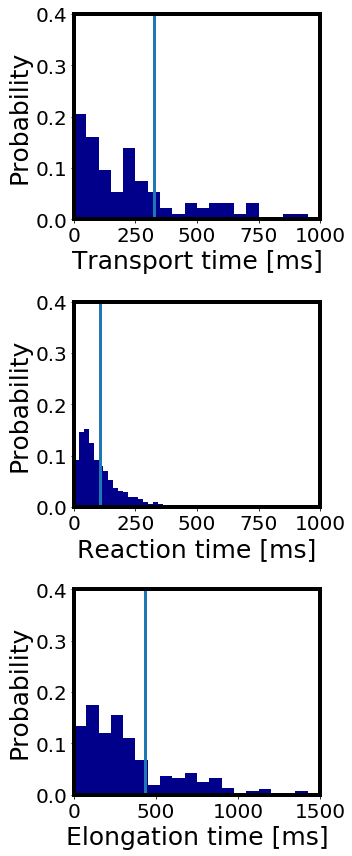

In [448]:
from IPython.core.display import display, HTML
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

%matplotlib inline
%load_ext autoreload
%autoreload

fig,[ax1,ax2,ax3] = plt.subplots(3,1,figsize=(5,12))
transport_hist = np.histogram([times[0] for times in transport_times],bins=20,range=(0,1000))

ax1.bar(transport_hist[1][0:-1],transport_hist[0]/sum(transport_hist[0]),align='edge',width=50,color='darkblue')
ax1.set_xlim(0,1000)
ax1.set_ylim(0,0.4)
ax1.set_ylabel('Probability',size=25)
ax1.set_xlabel('Transport time [ms]',size=25)
ax1.plot([np.average([times[0] for times in transport_times])]*2,[0,0.4],linewidth=3)
print(np.average([times[0] for times in transport_times]))


reaction_hist = np.histogram(reaction_times_exp,bins=20,range=(0,400))

ax2.bar(reaction_hist[1][0:-1],reaction_hist[0]/sum(reaction_hist[0]),align='edge',width=400/20,color='darkblue')
ax2.set_xlim(0,1000)
ax2.set_ylim(0,0.4)
ax2.set_ylabel('Probability',size=25)
ax2.set_xlabel('Reaction time [ms]',size=25)
ax2.plot([np.average(reaction_times_exp)]*2,[0,0.4],linewidth=3)
print(np.average(reaction_times_exp))


elongation_hist = np.histogram(elongation_times_exp,bins=20,range=(0,1500))

ax3.bar(elongation_hist[1][0:-1],elongation_hist[0]/sum(elongation_hist[0]),align='edge',width=1500/20,color='darkblue')
ax3.set_xlim(0,1500)
ax3.set_ylim(0,0.4)
ax3.set_ylabel('Probability',size=25)
ax3.set_xlabel('Elongation time [ms]',size=25)
ax3.plot([np.average(elongation_times_exp)]*2,[0,0.4],linewidth=3)


for _,axes in enumerate([ax1,ax2,ax3]):
    axes.spines['left'].set_linewidth(4)
    axes.spines['bottom'].set_linewidth(4)
    axes.spines['top'].set_linewidth(4)
    axes.spines['right'].set_linewidth(4)
    axes.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)


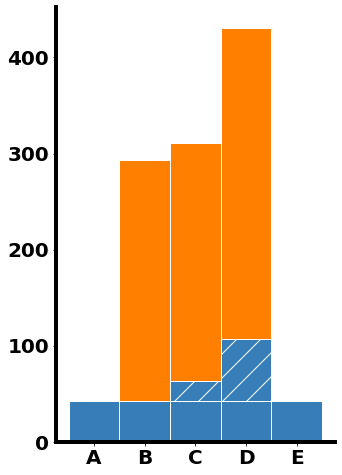

In [736]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

fig,ax=plt.subplots(1,1,figsize=(5,8))
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
tau_match_rxn=[42,42,42,42,42]
tau_mismatch_rxn=[0,0,21,65,0]
tau_transport=[0.08,251,248,324,0]
 
# Heights of bars1 + bars2
tau_rxn = np.add(tau_match_rxn, tau_mismatch_rxn).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, tau_match_rxn, color='#377eb8', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, tau_mismatch_rxn, bottom=tau_match_rxn, color='#377eb8', edgecolor='white', width=barWidth,hatch='/')
# Create green bars (top)
a=plt.bar(r, tau_transport, bottom=tau_rxn , color='#ff7f00', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')

plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(4)
plt.gca().spines['top'].set_linewidth(0)
plt.gca().spines['right'].set_linewidth(0)
plt.gca().tick_params(axis='both', which='major', labelsize=20)

# Show graphic
plt.show()

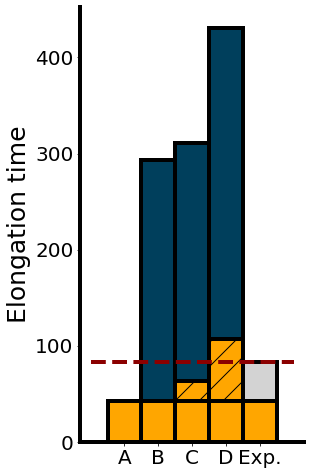

In [83]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

fig,ax=plt.subplots(1,1,figsize=(4,8))
 
# Values of each group
tau_match_rxn=[42,42,42,42,42]
tau_mismatch_rxn=[0,0,21,65,0]
tau_transport=[0.08,251,248,324,0]
tau_mystery = [0,0,0,0,41]
 
# Heights of bars1 + bars2
tau_rxn = np.add(tau_match_rxn, tau_mismatch_rxn).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','Exp.']
barWidth = 1
 
# Create brown bars
plt.bar(r, tau_match_rxn, color='#ffa600', edgecolor='black', linewidth=4,width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, tau_mismatch_rxn, bottom=tau_match_rxn, color='#ffa600', edgecolor='black',linewidth=4, width=barWidth,hatch='/')
# Create green bars (top)
plt.bar(r, tau_transport, bottom=tau_rxn , color='#003f5c', edgecolor='black', width=barWidth,linewidth=4)

plt.bar(r,tau_mystery,bottom=tau_rxn,color='lightgrey',edgecolor='black',width=barWidth,linewidth=4)

# Custom X axis
plt.xticks(r, names,rotation=0)

plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(4)
plt.gca().spines['top'].set_linewidth(0)
plt.gca().spines['right'].set_linewidth(0)
plt.gca().tick_params(axis='both', which='major', labelsize=20)

plt.ylabel('Elongation time',size=25)
plt.plot([-1,5],[83,83],color='darkred',linewidth=4,linestyle='--')
# Show graphic
plt.show()

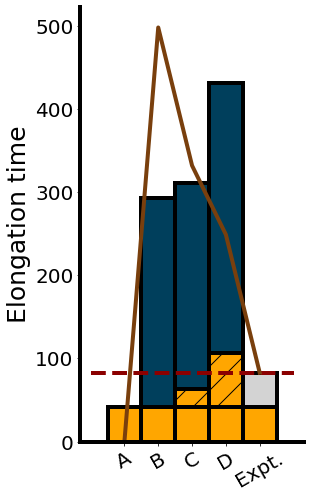

In [77]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

fig,ax=plt.subplots(1,1,figsize=(4,8))
 
# Values of each group
tau_match_rxn=[42,42,42,42,42]
tau_mismatch_rxn=[0,0,21,65,0]
tau_transport=[0.08,251,248,324,0]
tau_mystery = [0,0,0,0,41]
 
# Heights of bars1 + bars2
tau_rxn = np.add(tau_match_rxn, tau_mismatch_rxn).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','Expt.']
barWidth = 1
 
# Create brown bars
plt.bar(r, tau_match_rxn, color='#ffa600', edgecolor='black', linewidth=4,width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, tau_mismatch_rxn, bottom=tau_match_rxn, color='#ffa600', edgecolor='black',linewidth=4, width=barWidth,hatch='/')
# Create green bars (top)
plt.bar(r, tau_transport, bottom=tau_rxn , color='#003f5c', edgecolor='black', width=barWidth,linewidth=4)

plt.bar(r,tau_mystery,bottom=tau_rxn,color='lightgrey',edgecolor='black',width=barWidth,linewidth=4)

# Custom X axis
plt.xticks(r, names,rotation=30)

plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(4)
plt.gca().spines['top'].set_linewidth(0)
plt.gca().spines['right'].set_linewidth(0)
plt.gca().tick_params(axis='both', which='major', labelsize=20)

plt.ylabel('Elongation time',size=25)
plt.plot([-1,5],[83,83],color='darkred',linewidth=4,linestyle='--')

plt.plot([0,1,2,3,4],[0,498,332,249,83],color='#793F0D',linewidth=4)
# Show graphic
plt.show()

Text(0, 0.5, '$Da$')

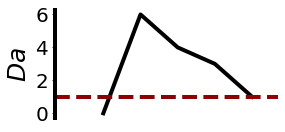

In [76]:
fig=plt.subplots(1,1,figsize=(4,2))
plt.plot([0.3,1.3,2.3,3.3,4.3],[0,6,4,3,1],color='black',linewidth=4)
plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(0)
plt.gca().spines['top'].set_linewidth(0)
plt.gca().spines['right'].set_linewidth(0)
plt.gca().tick_params(axis='both', which='major', labelsize=20)
plt.xticks([])
plt.yticks([0,2,4,6])
plt.xlim(-1,5)
plt.plot([-1,5],[1,1],color='darkred',linewidth=4,linestyle='--')
plt.ylabel(r'$Da$',size =25)

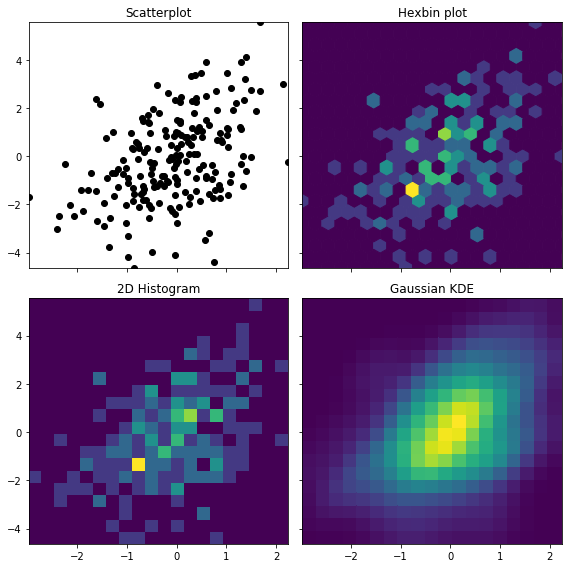

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

np.random.seed(1977)

# Generate 200 correlated x,y points
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x, y = data.T

nbins = 20

fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(8,8))

axes[0, 0].set_title('Scatterplot')
axes[0, 0].plot(x, y, 'ko')

axes[0, 1].set_title('Hexbin plot')
axes[0, 1].hexbin(x, y, gridsize=nbins)

axes[1, 0].set_title('2D Histogram')
axes[1, 0].hist2d(x, y, bins=nbins)

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

axes[1, 1].set_title('Gaussian KDE')
axes[1, 1].pcolormesh(xi, yi, zi.reshape(xi.shape))

fig.tight_layout()
plt.show()

In [507]:
from analysis_utils import *
%load_ext autoreload
%autoreload
path = "/Users/Akshay/Documents/TranslationDynamics/data/"

data = "191004_0018/"
gr_sim = dict()

for i in range(1,2):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+100,scaling=200)
    gr_sim[i] = (CellLatencies(sim_i))
    transport_times = np.array(sim_i[0])*1000/1608733
    reaction_times = (np.array(sim_i[1])*1000/1608733)
    search_times = (np.array(sim_i[5])*1000/1608733)
reaction_times_exp = list()
elongation_times_exp = list()
transport_times_exp=list()
for i in range(10000):
    trans_i, reac_i = random.choice(trans_reac)
    reac_i = reac_i + np.random.exponential((1000/1529+1000/209+1000/200+1000/32))
    reaction_times_exp.append(reac_i)
    transport_times_exp.append(trans_i)
    elongation_times_exp.append(reac_i+trans_i)
#gr_dict = {'gr_1':gr_sim}
#search_list = transportRxnCalc(gr_dict)[0]
#rxndiff['06'] = transportRxnCalc(gr_dict)[1:]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test


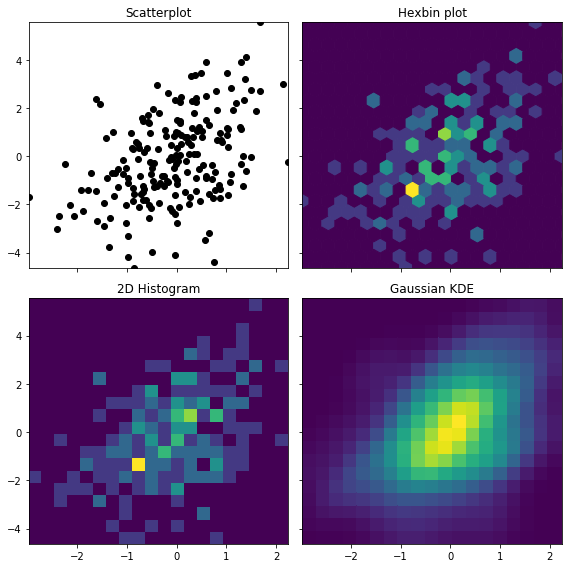

In [508]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

np.random.seed(1977)

# Generate 200 correlated x,y points
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x, y = data.T

nbins = 20

fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True, figsize=(8,8))

axes[0, 0].set_title('Scatterplot')
axes[0, 0].plot(x, y, 'ko')

axes[0, 1].set_title('Hexbin plot')
axes[0, 1].hexbin(x, y, gridsize=nbins)

axes[1, 0].set_title('2D Histogram')
axes[1, 0].hist2d(x, y, bins=nbins)

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

axes[1, 1].set_title('Gaussian KDE')
axes[1, 1].pcolormesh(xi, yi, zi.reshape(xi.shape))

fig.tight_layout()
plt.show()

(0, 700)

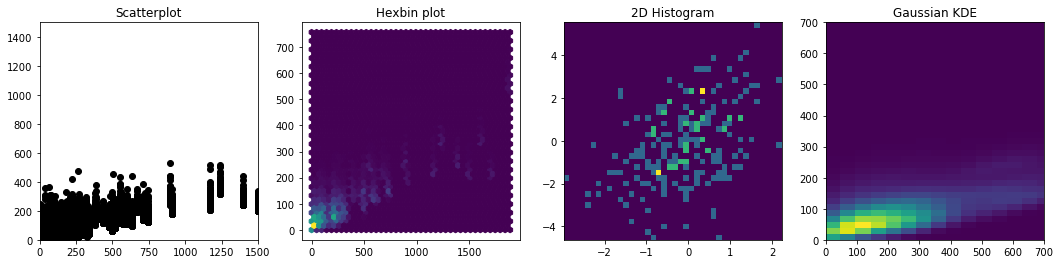

In [510]:
from scipy.stats import kde

fig,[ax,ax1,ax2,ax3] = plt.subplots(1,4, figsize=(18,4))
ax.set_title('Scatterplot')
ax.plot(transport_times_exp,reaction_times_exp,'ko')
ax.set_xlim(0,1500)
ax.set_ylim(0,1500)
ax1.set_title('Hexbin plot')
ax1.hexbin(transport_times_exp,reaction_times_exp,gridsize=40)

ax2.set_title('2D Histogram')
ax2.hist2d(x,y,bins=40)

nbins=40

transport_times_exp = np.array(transport_times_exp)
reaction_times_exp = np.array(reaction_times_exp)



k = kde.gaussian_kde([transport_times_exp,reaction_times_exp])
xi, yi = np.mgrid[transport_times_exp.min():transport_times_exp.max():nbins*1j, reaction_times_exp.min():reaction_times_exp.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

ax3.set_title('Gaussian KDE')
ax3.pcolormesh(xi, yi, zi.reshape(xi.shape))
ax3.set_xlim(0,700)
ax3.set_ylim(0,700)

In [685]:
## from analysis_utils import *
%load_ext autoreload
%autoreload
path = "/Users/Akshay/Documents/TranslationDynamics/data/"

data = "191204_2146/"
gr_sim = dict()

for i in range(1,2):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+900,scaling=1)
    gr_sim[i] = (CellLatencies(sim_i))
    transport_times = np.array(sim_i[0])*1000/1608733
    reaction_times = (np.array(sim_i[1])*1000/1608733)
    search_times = (np.array(sim_i[5])*1000/1608733)

import random
trans_reac = [([times[0] for times in transport_times][i], [times[0] for times in reaction_times][i]) for i in range(0, len([times[0] for times in reaction_times]))] 

reaction_times_exp = list()
elongation_times_exp = list()
transport_times_exp=list()
for i in range(20000):
    trans_i, reac_i = random.choice(trans_reac)
    reac_i = reac_i + np.random.exponential((1000/1529+1000/209+1000/200+1000/32))
    reaction_times_exp.append(reac_i)
    transport_times_exp.append(trans_i)
    elongation_times_exp.append(reac_i+trans_i)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test
missing expt
413
missing expt
503


0.07949993334702549
41.44595571236013


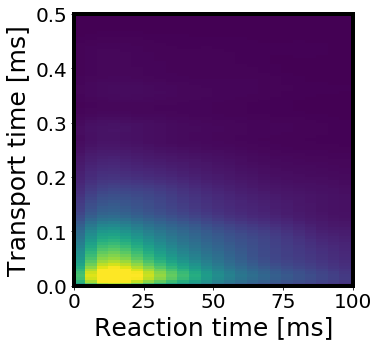

In [688]:
from matplotlib import colors as c
fig,ax3 = plt.subplots(1,1, figsize=(5,5))
transport_times_exp = np.array(transport_times_exp)
reaction_times_exp = np.array(reaction_times_exp)

nbins=100
k = kde.gaussian_kde([reaction_times_exp,transport_times_exp])
xi, yi = np.mgrid[reaction_times_exp.min():reaction_times_exp.max():nbins*1j, transport_times_exp.min():transport_times_exp.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

im=ax3.pcolormesh(xi, yi, zi.reshape(xi.shape),vmin=0,vmax=0.12,cmap='viridis')
ax3.set_ylim(0,0.5)
ax3.set_xlim(0,100)

ax3.set_ylabel('Transport time [ms]',size=25)
ax3.set_xlabel('Reaction time [ms]',size=25)
#cbar=plt.colorbar(im)

#cbar.set_ticks([0,0.03,0.06,0.09,0.12])
#cbar.set_ticklabels(['0','3','6','9','12'])
#cbar.ax.tick_params(labelsize=16)
for _,axes in enumerate([ax3]):
    axes.spines['left'].set_linewidth(4)
    axes.spines['bottom'].set_linewidth(4)
    axes.spines['top'].set_linewidth(4)
    axes.spines['right'].set_linewidth(4)
    axes.tick_params(axis='both', which='major', labelsize=20)
print(np.average(transport_times_exp))
print(np.average(reaction_times_exp))

In [683]:
from analysis_utils import *
%load_ext autoreload
%autoreload
path = "/Users/Akshay/Documents/TranslationDynamics/data/"

data = "191204_2044/"
gr_sim = dict()

for i in range(1,2):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+900,scaling=200)
    gr_sim[i] = (CellLatencies(sim_i))
    transport_times = np.array(sim_i[0])*1000/1608733
    reaction_times = (np.array(sim_i[1])*1000/1608733)
    search_times = (np.array(sim_i[5])*1000/1608733)
import random
trans_reac = [([times[0] for times in transport_times][i], [times[0] for times in reaction_times][i]) for i in range(0, len([times[0] for times in reaction_times]))] 

reaction_times_exp = list()
elongation_times_exp = list()
transport_times_exp=list()
for i in range(20000):
    trans_i, reac_i = random.choice(trans_reac)
    reac_i = reac_i + np.random.exponential((1000/1529+1000/209+1000/200+1000/32))
    reaction_times_exp.append(reac_i)
    transport_times_exp.append(trans_i)
    elongation_times_exp.append(reac_i+trans_i)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test
missing expt
434
missing expt
853


249.45613013793948
42.21106145025641


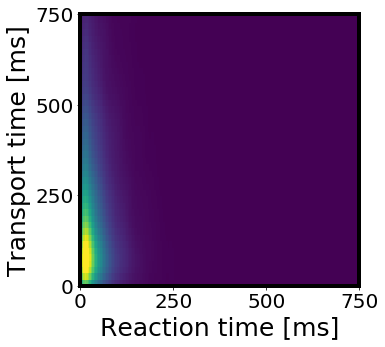

In [684]:
from matplotlib import colors as c
fig,ax3 = plt.subplots(1,1, figsize=(5,5))

ax3.set_facecolor('#440154FF')

transport_times_exp = np.array(transport_times_exp)
reaction_times_exp = np.array(reaction_times_exp)


nbins=100
k = kde.gaussian_kde([reaction_times_exp,transport_times_exp])
xi, yi = np.mgrid[reaction_times_exp.min():reaction_times_exp.max():nbins*1j, transport_times_exp.min():transport_times_exp.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

im=ax3.pcolormesh(xi, yi, zi.reshape(xi.shape),vmin=0,vmax=0.00004,cmap='viridis')
ax3.set_xlim(0,750)
ax3.set_ylim(0,750)
ax3.set_yticks(np.arange(0,751,250))
ax3.set_xticks(np.arange(0,751,250))
ax3.set_ylabel('Transport time [ms]',size=25)
ax3.set_xlabel('Reaction time [ms]',size=25)

#cbar=plt.colorbar(im)


#cbar.set_ticks([0,1e-5,2e-5,3e-5,4e-5])
#cbar.set_ticklabels(['0','1','2','3','4'])
#cbar.ax.tick_params(labelsize=16)

for _,axes in enumerate([ax3]):
    axes.spines['left'].set_linewidth(4)
    axes.spines['bottom'].set_linewidth(4)
    axes.spines['top'].set_linewidth(4)
    axes.spines['right'].set_linewidth(4)
    axes.tick_params(axis='both', which='major', labelsize=20)
print(np.average(transport_times_exp))
print(np.average(reaction_times_exp))

In [681]:
from analysis_utils import *
%load_ext autoreload
%autoreload
path = "/Users/Akshay/Documents/TranslationDynamics/data/"

data = "191204_1953/"
gr_sim = dict()

for i in range(1,2):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+900,scaling=200)
    gr_sim[i] = (CellLatencies(sim_i))
    transport_times = np.array(sim_i[0])*1000/1608733
    reaction_times = (np.array(sim_i[1])*1000/1608733)
    search_times = (np.array(sim_i[5])*1000/1608733)
import random
trans_reac = [([times[0] for times in transport_times][i], [times[0] for times in reaction_times][i]) for i in range(0, len([times[0] for times in reaction_times]))] 

reaction_times_exp = list()
elongation_times_exp = list()
transport_times_exp=list()
for i in range(20000):
    trans_i, reac_i = random.choice(trans_reac)
    reac_i = reac_i + np.random.exponential((1000/1529+1000/209+1000/200+1000/32))
    reaction_times_exp.append(reac_i)
    transport_times_exp.append(trans_i)
    elongation_times_exp.append(reac_i+trans_i)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test


244.43587339899875
61.80583856699773


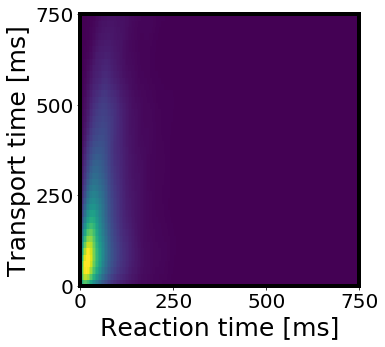

In [682]:
from matplotlib import colors as c
fig,ax3 = plt.subplots(1,1, figsize=(5,5))

ax3.set_facecolor('#440154FF')

transport_times_exp = np.array(transport_times_exp)
reaction_times_exp = np.array(reaction_times_exp)


nbins=100
k = kde.gaussian_kde([reaction_times_exp,transport_times_exp])
xi, yi = np.mgrid[reaction_times_exp.min():reaction_times_exp.max():nbins*1j, transport_times_exp.min():transport_times_exp.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

im=ax3.pcolormesh(xi, yi, zi.reshape(xi.shape),vmin=0,vmax=0.00004,cmap='viridis')
ax3.set_xlim(0,750)
ax3.set_ylim(0,750)
ax3.set_yticks(np.arange(0,751,250))
ax3.set_xticks(np.arange(0,751,250))
ax3.set_ylabel('Transport time [ms]',size=25)
ax3.set_xlabel('Reaction time [ms]',size=25)

#cbar=plt.colorbar(im)


#cbar.set_ticks([0,1e-5,2e-5,3e-5,4e-5])
#cbar.set_ticklabels(['0','1','2','3','4'])
#cbar.ax.tick_params(labelsize=16)

for _,axes in enumerate([ax3]):
    axes.spines['left'].set_linewidth(4)
    axes.spines['bottom'].set_linewidth(4)
    axes.spines['top'].set_linewidth(4)
    axes.spines['right'].set_linewidth(4)
    axes.tick_params(axis='both', which='major', labelsize=20)
print(np.average(transport_times_exp))
print(np.average(reaction_times_exp))

In [678]:
from analysis_utils import *
%load_ext autoreload
%autoreload
path = "/Users/Akshay/Documents/TranslationDynamics/data/"

data = "191004_0018/"
gr_sim = dict()

for i in range(1,2):
    sim_i = computeTransportRxnTimes(path+data, 1e15, 1e15, 100*(i-1),100*(i-1)+100,scaling=200)
    gr_sim[i] = (CellLatencies(sim_i))
    transport_times = np.array(sim_i[0])*1000/1608733
    reaction_times = (np.array(sim_i[1])*1000/1608733)
    search_times = (np.array(sim_i[5])*1000/1608733)

import random
trans_reac = [([times[0] for times in transport_times][i], [times[0] for times in reaction_times][i]) for i in range(0, len([times[0] for times in reaction_times]))] 

reaction_times_exp = list()
elongation_times_exp = list()
transport_times_exp=list()
for i in range(30000):
    trans_i, reac_i = random.choice(trans_reac)
    reac_i = reac_i + np.random.exponential((1000/1529+1000/209+1000/200+1000/32))
    reaction_times_exp.append(reac_i)
    transport_times_exp.append(trans_i)
    elongation_times_exp.append(reac_i+trans_i)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
test


323.5525900351647
107.0282968039973


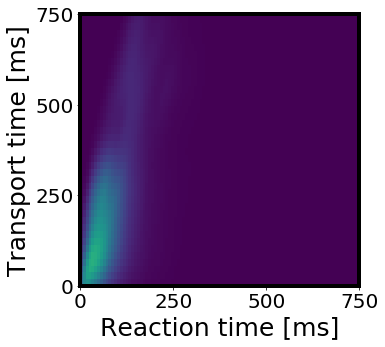

In [680]:
from matplotlib import colors as c
fig,ax3 = plt.subplots(1,1, figsize=(5,5))

ax3.set_facecolor('#440154FF')

transport_times_exp = np.array(transport_times_exp)
reaction_times_exp = np.array(reaction_times_exp)


nbins=100
k = kde.gaussian_kde([reaction_times_exp,transport_times_exp])
xi, yi = np.mgrid[reaction_times_exp.min():reaction_times_exp.max():nbins*1j, transport_times_exp.min():transport_times_exp.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

im=ax3.pcolormesh(xi, yi, zi.reshape(xi.shape),vmin=0,vmax=0.00004,cmap='viridis')
ax3.set_xlim(0,750)
ax3.set_ylim(0,750)
ax3.set_yticks(np.arange(0,751,250))
ax3.set_xticks(np.arange(0,751,250))
ax3.set_ylabel('Transport time [ms]',size=25)
ax3.set_xlabel('Reaction time [ms]',size=25)

#cbar=plt.colorbar(im)


#cbar.set_ticks([0,1e-5,2e-5,3e-5,4e-5])
#cbar.set_ticklabels(['0','1','2','3','4'])
#cbar.ax.tick_params(labelsize=16)

for _,axes in enumerate([ax3]):
    axes.spines['left'].set_linewidth(4)
    axes.spines['bottom'].set_linewidth(4)
    axes.spines['top'].set_linewidth(4)
    axes.spines['right'].set_linewidth(4)
    axes.tick_params(axis='both', which='major', labelsize=20)
print(np.average(transport_times_exp))
print(np.average(reaction_times_exp))